<a href="https://colab.research.google.com/github/ManishSuhas0026/NLP/blob/main/Manesh_530_Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wordcloud

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [53]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.preprocessing import OneHotEncoder
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, Embedding, SpatialDropout1D

In [ ]:
hyper_cars = "Hyper cars are the pinnacle of automotive engineering, boasting power-to-weight ratios that defy physics and acceleration that throws you back in your seat. Often featuring aerodynamic designs that resemble spaceships on wheels, they're not just fast, they're works of sculpted art. While ownership might be a dream for most, even witnessing a hyper car in person is a breathtaking experience"
continental_cuisine = "From the delicate pastries of France to the hearty stews of Germany, continental cuisine offers a flavor adventure for every palate. The focus on fresh, seasonal ingredients allows the natural flavors to shine through, creating a symphony of taste and texture. Whether you're indulging in a steaming plate of Italian pasta or savoring a perfectly aged cheese from Spain, continental food is a celebration of culinary heritage."

vectorizer = CountVectorizer()
corpus = [hyper_cars, continental_cuisine]
X = vectorizer.fit_transform(corpus)

similarity = cosine_similarity(X[0], X[1])
print("Cosine Similarity:", similarity[0][0])

Cosine Similarity: 0.28348752948777195


In [7]:
df = pd.read_csv('/content/data.csv')
df.sample(4)

,Sentence,Sentiment
390,These include software development for interne...,neutral
2973,Demand was brisk as expected and order levels ...,positive
2810,Central Europe is an important market area for...,neutral
1364,Finnish Suominen Corporation that makes wipes ...,neutral


In [8]:
df['Sentiment'].value_counts()

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

In [9]:
def remove_tags(text):
    clean_text = re.compile('<.*?>')
    return re.sub(clean_text,'',text)

In [10]:
stopwords_set = set(stopwords.words('english'))
ps = PorterStemmer()

In [11]:
def clean(text):
    words = word_tokenize(text)
    transformed_text = []
    for w in words:
        if w.isalnum():
            transformed_text.append(w.lower())

    cleaned_text = []
    for w in transformed_text:
        stemmed_word = ps.stem(w)
        if stemmed_word not in stopwords_set:
            cleaned_text.append(stemmed_word)

    return ' '.join(cleaned_text)

In [12]:
df['Sentence'] = df['Sentence'].apply(clean)
df.sample(4)

,Sentence,Sentiment
2699,uncommonli weak snow condit nearli everi marke...,neutral
639,eli lilli lli ha broken new high astrazeneca c...,positive
4437,vacon control 5 compani via invest fund power ...,neutral
63,astrazeneca profit sale stalwart fade,negative


In [13]:
df['Sentence'] = df['Sentence'].astype(str)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Sentence']))

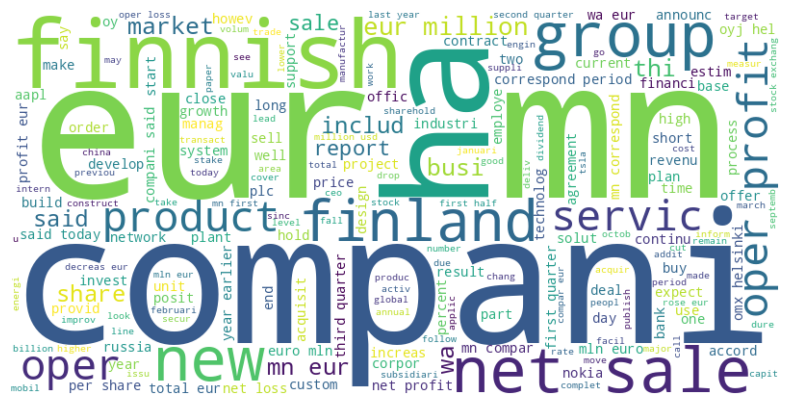

In [14]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
le = LabelEncoder()
trf  = le.fit_transform(df[['Sentiment']])
trf = pd.DataFrame(trf)
df['Sentiment'] = trf
df.sample(4)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Sentence,Sentiment
4058,long sdlp cpgx twtr bita labu fb tsla ete sdrl...,2
3377,aapl test high today probabl go beyond hour,2
4506,finnish bank ha issu profit warn,1
1751,busi divest offer dairi edibl fat packag multi...,1


In [16]:
cv = CountVectorizer(max_features=5000)

In [17]:
vectors = cv.fit_transform(df['Sentence'])
vectors.shape

(5842, 5000)

In [18]:
vectors = vectors.toarray()

In [21]:
X = vectors
y = df['Sentiment']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape

(4673, 5000)

In [22]:
mnb = MultinomialNB()

In [23]:
model=[mnb]

In [24]:
for m in model:
    m.fit(X_train,y_train)
    y_preds = m.predict(X_test)
    print(f'{m} score is :',accuracy_score(y_test,y_preds))

MultinomialNB() score is : 0.6826347305389222


In [38]:
df1=pd.read_csv("/content/data.csv")

In [39]:
df1.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [44]:
word = df1[df1['Sentiment'] != 'neutral']
print(word.shape)
word.head(5)

(2712, 2)


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative


In [45]:
word["Sentiment"].value_counts()

Sentiment
positive    1852
negative     860
Name: count, dtype: int64

In [46]:
sentiment_label = word.Sentiment.factorize()
sentiment_label

(array([0, 1, 0, ..., 0, 1, 0]),
 Index(['positive', 'negative'], dtype='object'))

In [48]:
tweet = word.Sentence.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [49]:
print(tokenizer.word_index)

{'the': 1, 'to': 2, 'in': 3, 'of': 4, 'and': 5, 'a': 6, 'eur': 7, 'for': 8, 'from': 9, 'mn': 10, 'on': 11, "'s": 12, 'profit': 13, '1': 14, 'sales': 15, 'year': 16, 'its': 17, 'by': 18, 'net': 19, 'company': 20, '2': 21, 'finnish': 22, 'co': 23, 'with': 24, 'said': 25, 'has': 26, '3': 27, 'million': 28, '5': 29, 'as': 30, 'it': 31, 'is': 32, 'will': 33, 'period': 34, 'at': 35, 'm': 36, '4': 37, 'up': 38, 'operating': 39, 'quarter': 40, '0': 41, 'mln': 42, '6': 43, '2009': 44, 'that': 45, '7': 46, 'was': 47, '8': 48, '2008': 49, '9': 50, 'be': 51, 'loss': 52, '2007': 53, '2010': 54, 'first': 55, 'this': 56, 't': 57, 'http': 58, 'share': 59, 'compared': 60, 'oyj': 61, 'group': 62, 'https': 63, 'stks': 64, 'down': 65, 'an': 66, 'today': 67, 'new': 68, 'corresponding': 69, 'are': 70, 'finland': 71, 'euro': 72, 'increased': 73, "''": 74, 'market': 75, 'rose': 76, 'percent': 77, '2006': 78, 'long': 79, 'have': 80, '000': 81, 'aapl': 82, 'price': 83, '10': 84, 'also': 85, 'after': 86, 'per': 

In [73]:
embedding_vector_length = 32
model_rnn = Sequential()
model_rnn.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model_rnn.add(SpatialDropout1D(0.25))
model_rnn.add(SimpleRNN(50, dropout=0.5, recurrent_dropout=0.5))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'], run_eagerly=True)
print(model_rnn.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 200, 32)           236256    
                                                                 
 spatial_dropout1d_6 (Spati  (None, 200, 32)           0         
 alDropout1D)                                                    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 50)                4150      
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 240457 (939.29 KB)
Trainable params: 240457 (939.29 KB)
Non-trainable params: 0 (0.00 Byte)
_____________

In [54]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           236256    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 252907 (987.92 KB)
Trainable params: 252907 (987.92 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [75]:
history1 = model_rnn.fit(padded_sequence, sentiment_label[0], validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
68/68 [==============================] - 44s 652ms/step - loss: 0.7765 - accuracy: 0.5131 - val_loss: 0.6761 - val_accuracy: 0.6206
Epoch 2/10
68/68 [==============================] - 40s 591ms/step - loss: 0.7411 - accuracy: 0.5302 - val_loss: 0.6665 - val_accuracy: 0.6556
Epoch 3/10
68/68 [==============================] - 70s 1s/step - loss: 0.7214 - accuracy: 0.5403 - val_loss: 0.6456 - val_accuracy: 0.6630
Epoch 4/10
68/68 [==============================] - 40s 590ms/step - loss: 0.6921 - accuracy: 0.5726 - val_loss: 0.6383 - val_accuracy: 0.6630
Epoch 5/10
68/68 [==============================] - 40s 594ms/step - loss: 0.6788 - accuracy: 0.5800 - val_loss: 0.6374 - val_accuracy: 0.6630
Epoch 6/10
68/68 [==============================] - 45s 672ms/step - loss: 0.6679 - accuracy: 0.6058 - val_loss: 0.6359 - val_accuracy: 0.6630
Epoch 7/10
68/68 [==============================] - 42s 617ms/step - loss: 0.6510 - accuracy: 0.6284 - val_loss: 0.6362 - val_accuracy: 0.6630
Ep

In [55]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
68/68 [==============================] - 22s 261ms/step - loss: 0.6381 - accuracy: 0.6796 - val_loss: 0.6327 - val_accuracy: 0.6630
Epoch 2/10
68/68 [==============================] - 17s 251ms/step - loss: 0.5701 - accuracy: 0.6994 - val_loss: 0.5359 - val_accuracy: 0.7182
Epoch 3/10
68/68 [==============================] - 18s 266ms/step - loss: 0.5101 - accuracy: 0.7953 - val_loss: 0.5469 - val_accuracy: 0.7293
Epoch 4/10
68/68 [==============================] - 17s 249ms/step - loss: 0.3538 - accuracy: 0.8598 - val_loss: 0.4694 - val_accuracy: 0.7956
Epoch 5/10
68/68 [==============================] - 18s 263ms/step - loss: 0.2238 - accuracy: 0.9193 - val_loss: 0.4299 - val_accuracy: 0.8177
Epoch 6/10
68/68 [==============================] - 17s 250ms/step - loss: 0.1621 - accuracy: 0.9474 - val_loss: 0.4279 - val_accuracy: 0.8343
Epoch 7/10
68/68 [==============================] - 17s 255ms/step - loss: 0.1215 - accuracy: 0.9553 - val_loss: 0.5009 - val_accuracy: 0.8214

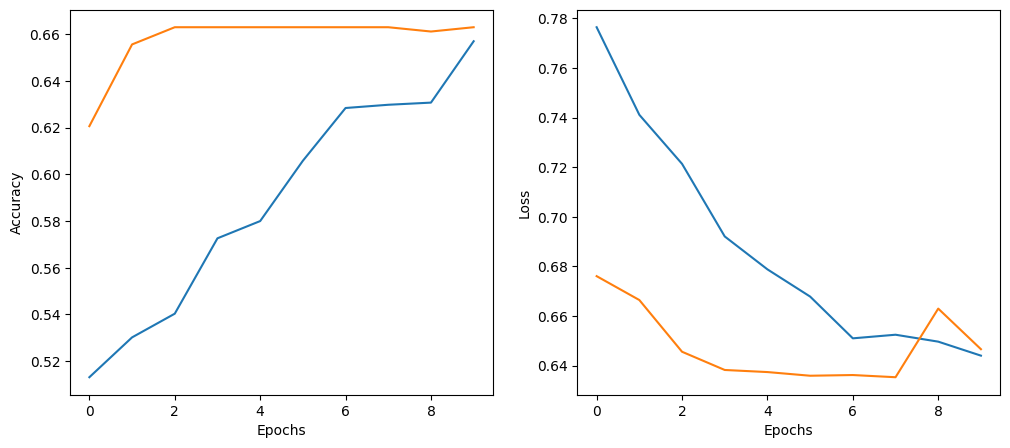

In [76]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.subplot(1,2,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

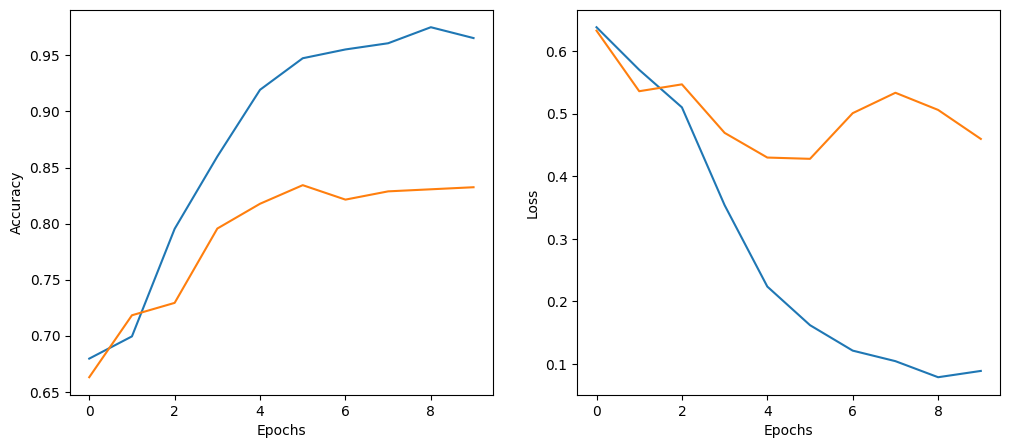

In [56]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [77]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model_rnn.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "Aced that test!."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 483ms/step
Predicted label:  positive
1/1 [==============================] - 0s 265ms/step
Predicted label:  positive


In [58]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "Aced that test!."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 72ms/step
Predicted label:  positive
1/1 [==============================] - 0s 72ms/step
Predicted label:  negative
